In [24]:
import numpy as npy

# データ生成
xnum = 8
views =[235,375,568,931,1497,1542,3176,1084]
users =[24,93,154,370,746,868,1809,699]

# データをblog_data.npzファイルに保存する
npy.savez('blog_data.npz',X=views,X_min=min(views),X_max=max(views),X_n=len(views),Y=users)

# データをblog_data.npzファイルから取り出す
sample_data = npy.load('blog_data.npz')

print(sample_data['X'])
print(sample_data['X_min'])


[ 235  375  568  931 1497 1542 3176 1084]
235


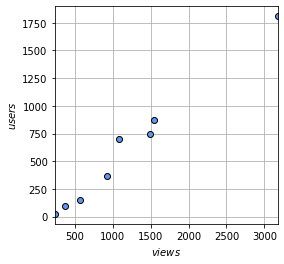

In [28]:
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

# データをblog_data.npzファイルから取り出す
sample_data = npy.load('blog_data.npz')

plt.figure(figsize=(4,4))
plt.plot(sample_data['X'],sample_data['Y'],marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim(sample_data['X_min'],sample_data['X_max'])
# X軸に名前を付ける
plt.xlabel('$views$')
# Y軸に名前を付ける
plt.ylabel('$users$')
plt.grid(True)


In [ ]:
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

def show_line(a, sample_data):
    xb = npy.linespace(sample_data['X_min'],sample_data['X_max'],100)
    y =a[0]*xb + w[1]
    plt.plot(xb,y,color='blue',linewidth=4)

# データをblog_data.npzファイルから取り出す
sample_data = npy.load('blog_data.npz')

plt.figure(figsize=(4,4))
plt.plot(sample_data['X'],sample_data['Y'],marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim(sample_data['X_min'],sample_data['X_max'])
# X軸に名前を付ける
plt.xlabel('$views$')
# Y軸に名前を付ける
plt.ylabel('$users$')
plt.grid(True)



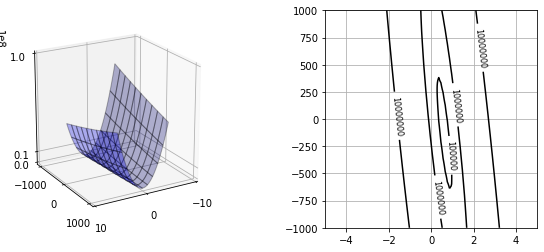

In [45]:
import numpy as npy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# 平均誤差関数
def mse_line(x,t,w):
    y = w[0]*x + w[1]
    # 要素の平均を求める
    mse = npy.mean((y-t)**2)
    
    return mse

# データの読み込み
sample_data = npy.load('blog_data.npz')

# データの計算
xn = 100
w0_range = [-5, 5]
w1_range = [-1000, 1000]
w0 = npy.linspace(w0_range[0],w0_range[1],xn)
w1 = npy.linspace(w1_range[0],w1_range[1],xn)
# グリッドを作成する
ww0, ww1 = npy.meshgrid(w0, w1)
J = npy.zeros((len(w0), len(w1)))

for i0 in range(len(w0)):
    for i1 in range(len(w1)):
        J[i1, i0] = mse_line(sample_data['X'],sample_data['Y'],(w0[i0], w1[i1]))

# 表示
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1,2,1,projection='3d')

ax.plot_surface(ww0, ww1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')

ax.set_xticks([-10, 0, 10])
ax.set_yticks([-1000, 0, 1000])
ax.set_zticks([0, 10000000, 100000000])
ax.view_init(20, 60)

plt.subplot(1,2,2)
cont = plt.contour(ww0, ww1, J, 30, colors='black', levels=[100000, 1000000, 10000000])
cont.clabel(fmt='%d', fontsize=8)
plt.grid(True)
plt.show()



In [48]:
import numpy as npy

# 平均誤差関数
def mse_line(x,t,w):
    y = w[0]*x + w[1]
    # 要素の平均を求める
    mse = npy.mean((y-t)**2)
    
    return mse

# データの読み込み
sample_data = npy.load('blog_data.npz')

# データの計算
xn = 100
w0_range = [-5, 5]
w1_range = [-1000, 1000]
w0 = npy.linspace(w0_range[0],w0_range[1],xn)
w1 = npy.linspace(w1_range[0],w1_range[1],xn)
# グリッドを作成する
ww0, ww1 = npy.meshgrid(w0, w1)
J = npy.zeros((len(w0), len(w1)))

min_J = 10000
min_w0 = 0
min_w1 = 0

for i0 in range(len(w0)):
    for i1 in range(len(w1)):
        J[i1, i0] = mse_line(sample_data['X'],sample_data['Y'],(w0[i0], w1[i1]))
        
        if min_J > J[i1, i0]:
            min_J = J[i1, i0]
            min_w0 = w0[i0]
            min_w1 = w1[i1]

print('Jの最小値')
print(min_J)
print('w0 = '+str(min_w0) +', w1 = ' + str(min_w1))

Jの最小値
6290.442467605344
w0 = 0.6565656565656566, w1 = -171.71717171717182


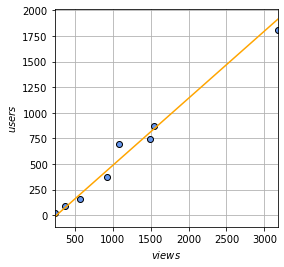

In [49]:
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

# 最小二乗法により求めた関数
def f(x):
    return 0.6565656565656566*x -171.71717171717182

# データをblog_data.npzファイルから取り出す
sample_data = npy.load('blog_data.npz')

plt.figure(figsize=(4,4))
plt.plot(sample_data['X'],sample_data['Y'],marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim(sample_data['X_min'],sample_data['X_max'])

# 一次関数の図示する
xline = npy.linspace(sample_data['X_min'],sample_data['X_max'],100)
yline1 = f(xline)
plt.plot(xline, yline1, color ='orange')

# X軸に名前を付ける
plt.xlabel('$views$')
# Y軸に名前を付ける
plt.ylabel('$users$')
plt.grid(True)

In [85]:
import numpy as npy

# 最小二乗法により求めた関数
def f(x):
    return 0.6565656565656566*x -171.71717171717182

xline = npy.array([1000,5000,10000,20000,30000])
yline = npy.round(f(xline))

print('ページビュー数')
print(xline)
print('ユーザ数')
print(yline)



ページビュー数
[ 1000  5000 10000 20000 30000]
ユーザ数
[  485.  3111.  6394. 12960. 19525.]


C:\Users\wanta\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()


y = 0.617x + -130.731


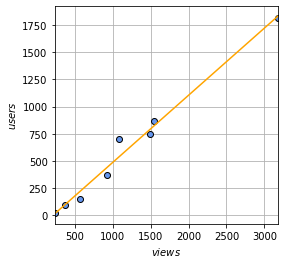

In [105]:
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

# データをblog_data.npzファイルから取り出す
sample_data = npy.load('blog_data.npz')

plt.figure(figsize=(4,4))
plt.plot(sample_data['X'],sample_data['Y'],marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim(sample_data['X_min'],sample_data['X_max'])

# 一次関数の図示する
X = sample_data['X']
X = np.array([X, npy.ones(len(X))])
X = X.T
w0,w1 = npy.linalg.lstsq(X,sample_data['Y'].tolist())[0]
w0 = npy.round(w0,3)
w1 = npy.round(w1,3)
xline = npy.linspace(sample_data['X_min'],sample_data['X_max'],100)
plt.plot(xline, w0*xline+w1, color ='orange')

# X軸に名前を付ける
plt.xlabel('$views$')
# Y軸に名前を付ける
plt.ylabel('$users$')
plt.grid(True)

print('y = '+str(w0)+'x + ' +str(w1))